# Quantum BH metric

# Inhaltsverzeichnis
% links with $$ dont work yet
1. [Imports](##imports)
2. [Introduction](#introduction)
   - [Variables](#variables)
   - [Background of $Q_b$ and $Q_c$](#background-of-qb-and-qc) 
   - [Immirzi Parameter](#immirzi-parameter)
   - [GUP Parameters $\beta_b$ and $\beta_c$](#gup-parameters-βb-and-βc) 
3. [Effective Potential $V_\text{eff}$](#effective-potential-veff)
   -  [Schwarzschield](###schwarzschield)
   -  [Improved Metric](###improved-metric)
   - [Conclusion](###conclusion)
4. [Light ray orbits](##light-ray-orbits)
   - [Examples](###examples)
   - [Shadow of a black hole](###shadow-of-a-black-hole)
5. [References](#references)

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from sympy import latex
from IPython.display import display, Markdown
import matplotlib.colors as mcolors
from itertools import product
import draft_v2
import Helper
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

**OGRePy: An <u>O</u>bject-Oriented <u>G</u>eneral <u>Re</u>lativity Package for <u>Py</u>thon\
By [Barak Shoshany](https://github.com/bshoshany) ([baraksh@gmail.com](mailto:baraksh@gmail.com)) ([baraksh.com](https://baraksh.com/))\
v1.2.0 (2024-09-15)\
GitHub repository: <https://github.com/bshoshany/OGRePy>\
Documentation: <a href="c:/Users/lukas/AppData/Local/Programs/Python/Python313/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.ipynb">.ipynb</a>, <a href="c:/Users/lukas/AppData/Local/Programs/Python/Python313/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.pdf">.pdf</a>, <a href="#" onclick="window.open('file:///c:/Users/lukas/AppData/Local/Programs/Python/Python313/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.html', '_blank')">.html</a>**

## Introduction
In the following section, a improved full-spacetime metric is defined/implemented in the code. Based on [A generalized uncertainty-inspired quantum black hole](https://arxiv.org/abs/2406.03909) [1]


### Variables

The metric equations are depndend on four variables.
1. $M$ which refers to the mass of the BH (Blackhole).
2. $R_s=2MG$ which is the gravitational radius of the BH.
3. $Q_b$ which is a defined  quantitie to modifie the spacetime metric.
4. $Q_c$ which is also a defined  quantitie to modifie the spacetime metric.

In the first section of the code we define all these variables, and in the following sections of the code we define various functions that rely on $Q_b$ and $Q_c$. 

### Background of $Q_b$ and $Q_c$

$Q_b$ and $Q_c$ are defined trough the following mathematical Form (compare eq. 4.19 - 4.20): 

\begin{align}Q_b&=|\beta_b|\gamma^2L_0^2 \\Q_c&=|\beta_c|\gamma^2L_0^6 \end{align}

where $\beta_b$ and $\beta_c$ are the so called GUP parameters and $\gamma$ is the Barbero-Immirzi parameter.

### Immirzi parameter

"The Immirzi parameter measures the size of the quantum of area in Planck units." [!]. 

Its value is: 

\begin{align} \gamma=\begin{cases} \frac{\ln(2)}{\sqrt{3}\pi} \\\frac{\ln(3)}{\sqrt{8}\pi}\end{cases} \end{align}

Note: The way of choosing the Immirzi parameter recovers the Bekenstein-Hawking formula. (For more information, see the Wikipedia article linked above)

### GUP paramters $\beta_b$ and $\beta_c$

The GUP parameters are used to generalise the uncertainty principle. More information can be found either in section 3.1 of [A generalized uncertainty-inspired quantum black hole](https://arxiv.org/abs/2406.03909) [1] or on [Wikipedia](https://en.wikipedia.org/wiki/Generalized_uncertainty_principle) [2].

In [2]:
# definig variables 
gamma = Helper.SymbolWithValue('gamma', np.log(2) / (np.sqrt(3) * np.pi))
beta_b, beta_c = Helper.SymbolWithValue('beta_b', 0), Helper.SymbolWithValue('beta_c', 0)
L_0 = Helper.SymbolWithValue('L_0', 5)
M = 1
r = sp.Symbol("r", nonnegative=True)

# definitions to calculate Q_b/c in dependence of beta and L_0 which gives us more possibilitys  to compare the influence of Q_b/c on different eq.

Q_b = Helper.SymbolicFunction2(abs(beta_b) * gamma ** 2 * L_0 ** 2, [gamma, L_0], beta_b, name='Q_b')
Q_c = Helper.SymbolicFunction2(abs(beta_c) * gamma ** 2 * L_0 ** 6, [gamma, L_0], beta_c, name='Q_c')

'''
-----------------------------------------------------------------------------------------------------------------------------------------------------
'''
display(Markdown("## Check definitons:"))

Helper.printTeX(Q_b.sym, Text='Q_b=')
Helper.printTeX(Q_c.sym, Text='Q_c=')

**OGRePy**: A new version of the package is available: **v1.3.0** ([view changelog](https://github.com/bshoshany/OGRePy/blob/master/CHANGELOG.md)). To update, please execute the following commands in a notebook cell:
```
%pip install --upgrade OGRePy
%reset --aggressive -f
from OGRePy import *
```

## Check definitons:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Improved full spacetime metric**

In the following we will impliment the Improved full spacetime metric tensor in the code using the following equations: 
\begin{align}
f(t)&=\left(1+\frac{Q_b}{r^2}\right)\cdot\left(1+\frac{Q_c \cdot R_s^2}{4r^8}\right)^{-\frac{1}{4}}\cdot\left(1-\frac{R_s}{\sqrt{r^2+Q_b}}\right) \\
g(t)&=\left(1+\frac{Q_c \cdot R_s^2}{4r^8}\right)^{\frac{1}{4}}\cdot\left(1-\frac{R_s}{\sqrt{r^2+Q_b}}\right)^{-1} \\
h(t)&=r^2\left(1+\frac{Q_c \cdot R_s^2}{4r^8}\right)^{\frac{1}{4}}\\
\text{with: }&\text{diag}(-f,g,h, \sin^2(\theta)h)
\end{align}
[Compare eq. 4.25-4.27] 

In [3]:
R_s = sp.Symbol('R_s')

q_b, q_c = sp.Symbol('Q_b'), sp.Symbol('Q_c')
param= (q_b, q_c, R_s)

f = sp.Lambda((r, param), (1 + q_b / r**2) * (1 + q_c * (R_s)**2 / (4 * r**8))**(-1 / 4) * ( 1 - (R_s)/ sp.sqrt(r**2 + q_b )))
g = sp.Lambda((r, param), (1 + q_c * R_s**2 / (4 * r**8))**(1 / 4) * (1 - R_s / sp.sqrt(r**2 + q_b ))**(-1))
h = sp.Lambda((r, param), r**2 * (1 + q_c * R_s**2 / (4 * r**8))**(1 / 4))


'''
-----------------------------------------------------------------------------------------------------------------------------------------------------
'''
display(Markdown("## Check definitons:"))
Helper.printTeX(f.expr, 'f=')
Helper.printTeX(g.expr, 'g=')
Helper.printTeX(h.expr, 'h=')


## Check definitons:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
Schwarzschield = draft_v2.MetricSystem(f, g, h, (beta_b.value, beta_c.value, L_0.value))
Impr = draft_v2.MetricSystem(f, g, h, (q_b, q_c, R_s))
BlackHole =  draft_v2.BH(M, [Schwarzschield, Impr], ['Schwarzschield', 'Impr'])

display(Markdown("## Check definitons:"))
display(Markdown("Schwarzschield:"))
~BlackHole.Schwarzschield()
Helper.printTeX(BlackHole.Schwarzschield().line_element())
display(Markdown("Improved:"))
~BlackHole.Impr()

## Check definitons:

Schwarzschield:

$$\begin{align*}
    \eta{}_{t}{}_{t} &= -1 + \frac{5}{r} \\
    \eta{}_{r}{}_{r} &= \frac{1}{1 - \frac{5}{r}} \\
    \eta{}_{\theta}{}_{\theta} &= r^{2} \\
    \eta{}_{\phi}{}_{\phi} &= r^{2} \sin^{2}{\left(\theta \right)} 
\end{align*}$$

<IPython.core.display.Math object>

Improved:

$$\begin{align*}
    \eta{}_{t}{}_{t} &= - \frac{\left(\frac{Q_{b}}{r^{2}} + 1\right) \left(- \frac{R_{s}}{\sqrt{Q_{b} + r^{2}}} + 1\right)}{\left(\frac{Q_{c} R_{s}^{2}}{4 r^{8}} + 1\right)^{0.25}} \\
    \eta{}_{r}{}_{r} &= \frac{\left(\frac{Q_{c} R_{s}^{2}}{4 r^{8}} + 1\right)^{0.25}}{- \frac{R_{s}}{\sqrt{Q_{b} + r^{2}}} + 1} \\
    \eta{}_{\theta}{}_{\theta} &= r^{2} \left(\frac{Q_{c} R_{s}^{2}}{4 r^{8}} + 1\right)^{0.25} \\
    \eta{}_{\phi}{}_{\phi} &= r^{2} \left(\frac{Q_{c} R_{s}^{2}}{4 r^{8}} + 1\right)^{0.25} \sin^{2}{\left(\theta \right)} 
\end{align*}$$


Comment: As you can see, we created the Scharzschield metric using the improved metric and setting the parameters to 0.

## Effective potential $V_\text{eff}$
The effective potential combines potential energy and azimuthal kinetic energy of the orbiting object. It is therefore dependent on the radius $r$ and the conserved
angular momentum L of the object, as well as the mass of the black hole .

### Schwarzschield

Firstly, we look at the effective potential using the Schwarzschield metric. 

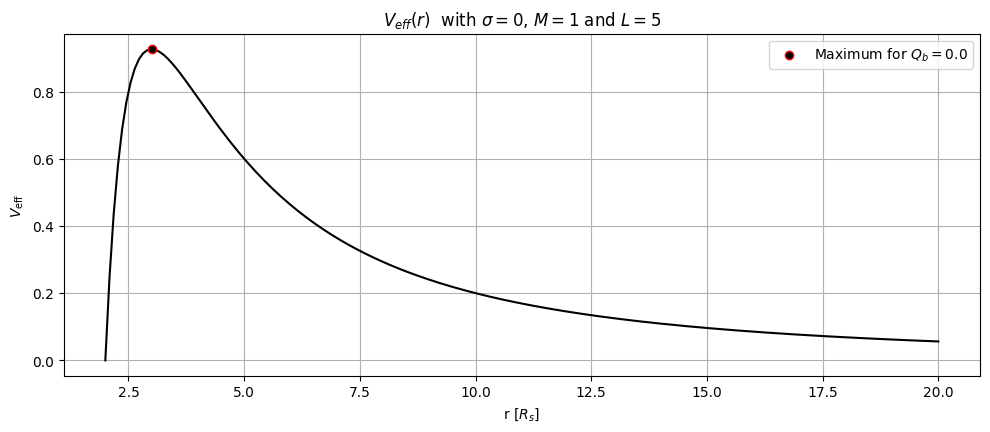

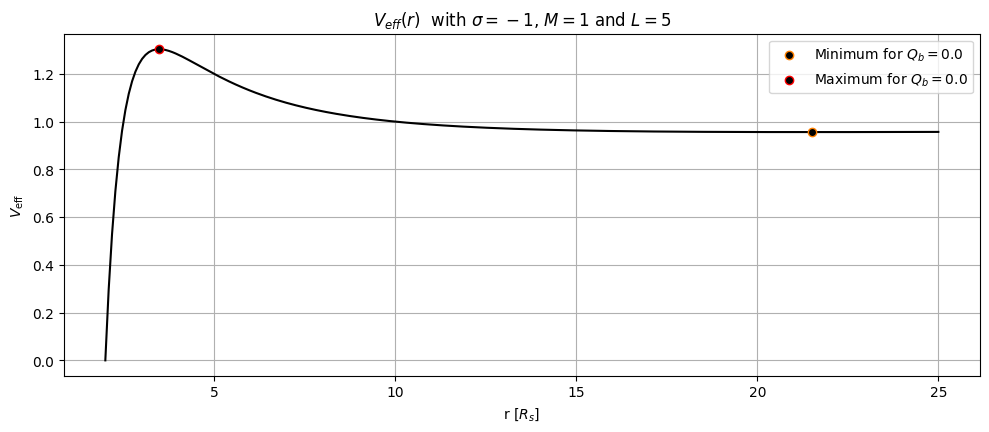

In [5]:
Helper.Veff_plt( BlackHole.Impr,sigma=0, grad=1,L=5, r_int=[2,20])
Helper.Veff_plt( BlackHole.Impr,sigma=-1, grad=1,L=5, r_int=[2,25])

### Improved Metric

Now let's see how it changes when the parameter $Q_b$ is changed, with $Q_b \in [0,1]$.

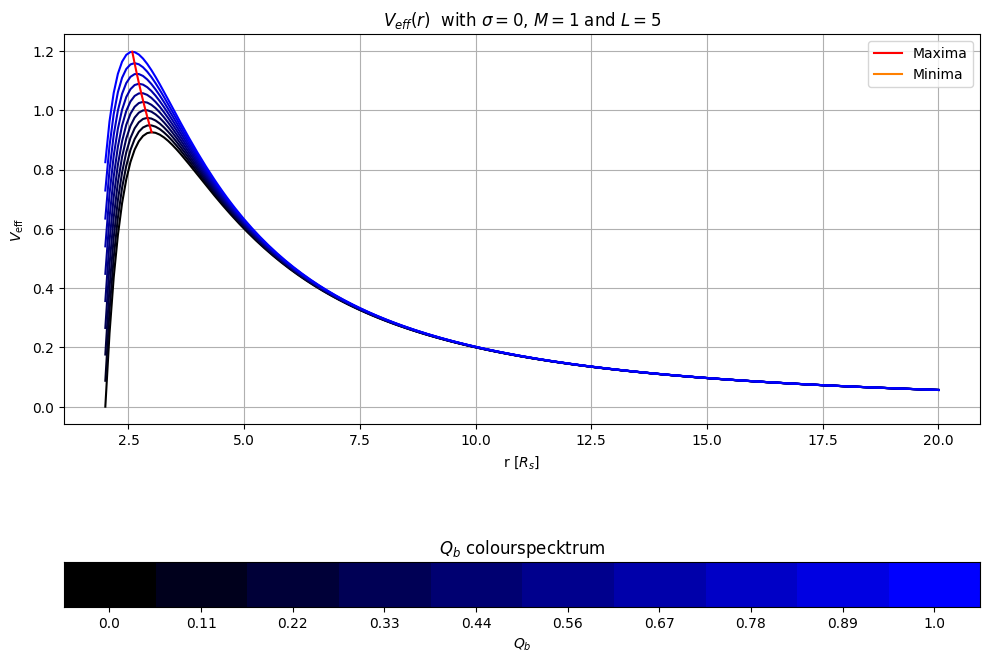

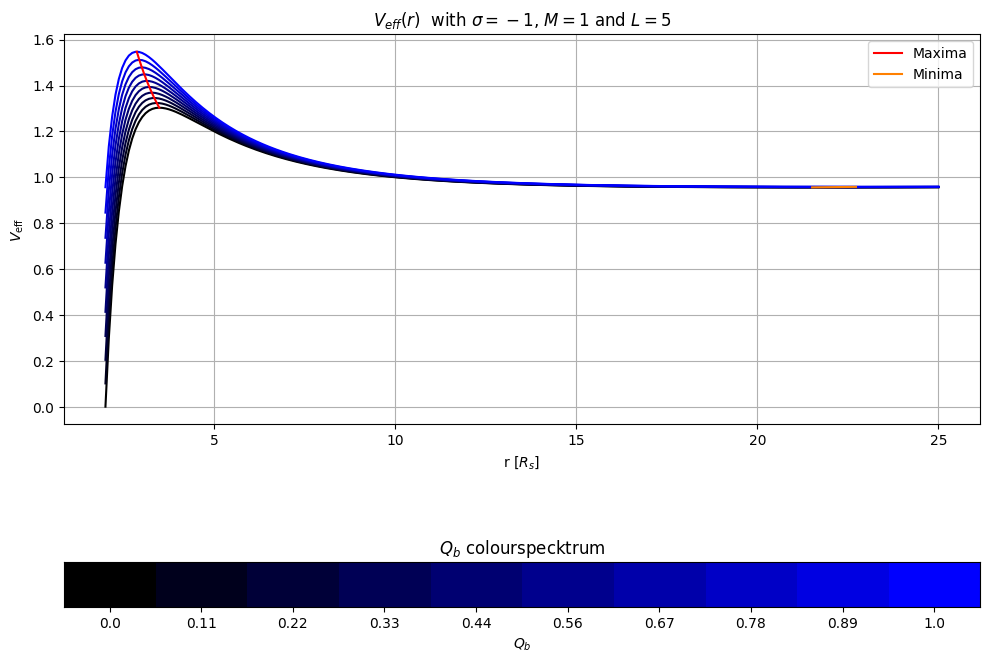

In [6]:
Helper.Veff_plt( BlackHole.Impr,sigma=0, grad=10,L=5, r_int=[2,20])
Helper.Veff_plt( BlackHole.Impr,sigma=-1, grad=10,L=5, r_int=[2,25])

### Conclusion

It can be seen that the curves for alternating Q_b are similar to the Schwarzschield curve. However, changes can be recognised in the area of the maximum. The maximum is larger and shifted to the left. In addition, the minimum (for massive particles) is shifted to the right. Overall, the following applies: $Q_{b1}>Q_{b2} \rightarrow V_1(r)>V_2(r) \, \forall r \in (R_s, \infty)$

## Light ray orbits

Depending on the starting position and total energy, light can fall into the black hole or escape from it. If $V_\text{eff max}> E$ and $r_\text{max}<r_0$ the light escapes. if one of these two properties is not fulfilled, it falls into the black hole. An exception applies in the case of $V_\text{eff max}= E$ and $r_\text{max} \leq r_0$ in this case the light does not escape, but it also does not fall into the event horizon. This is called the shadow of a black hole.

### Examples

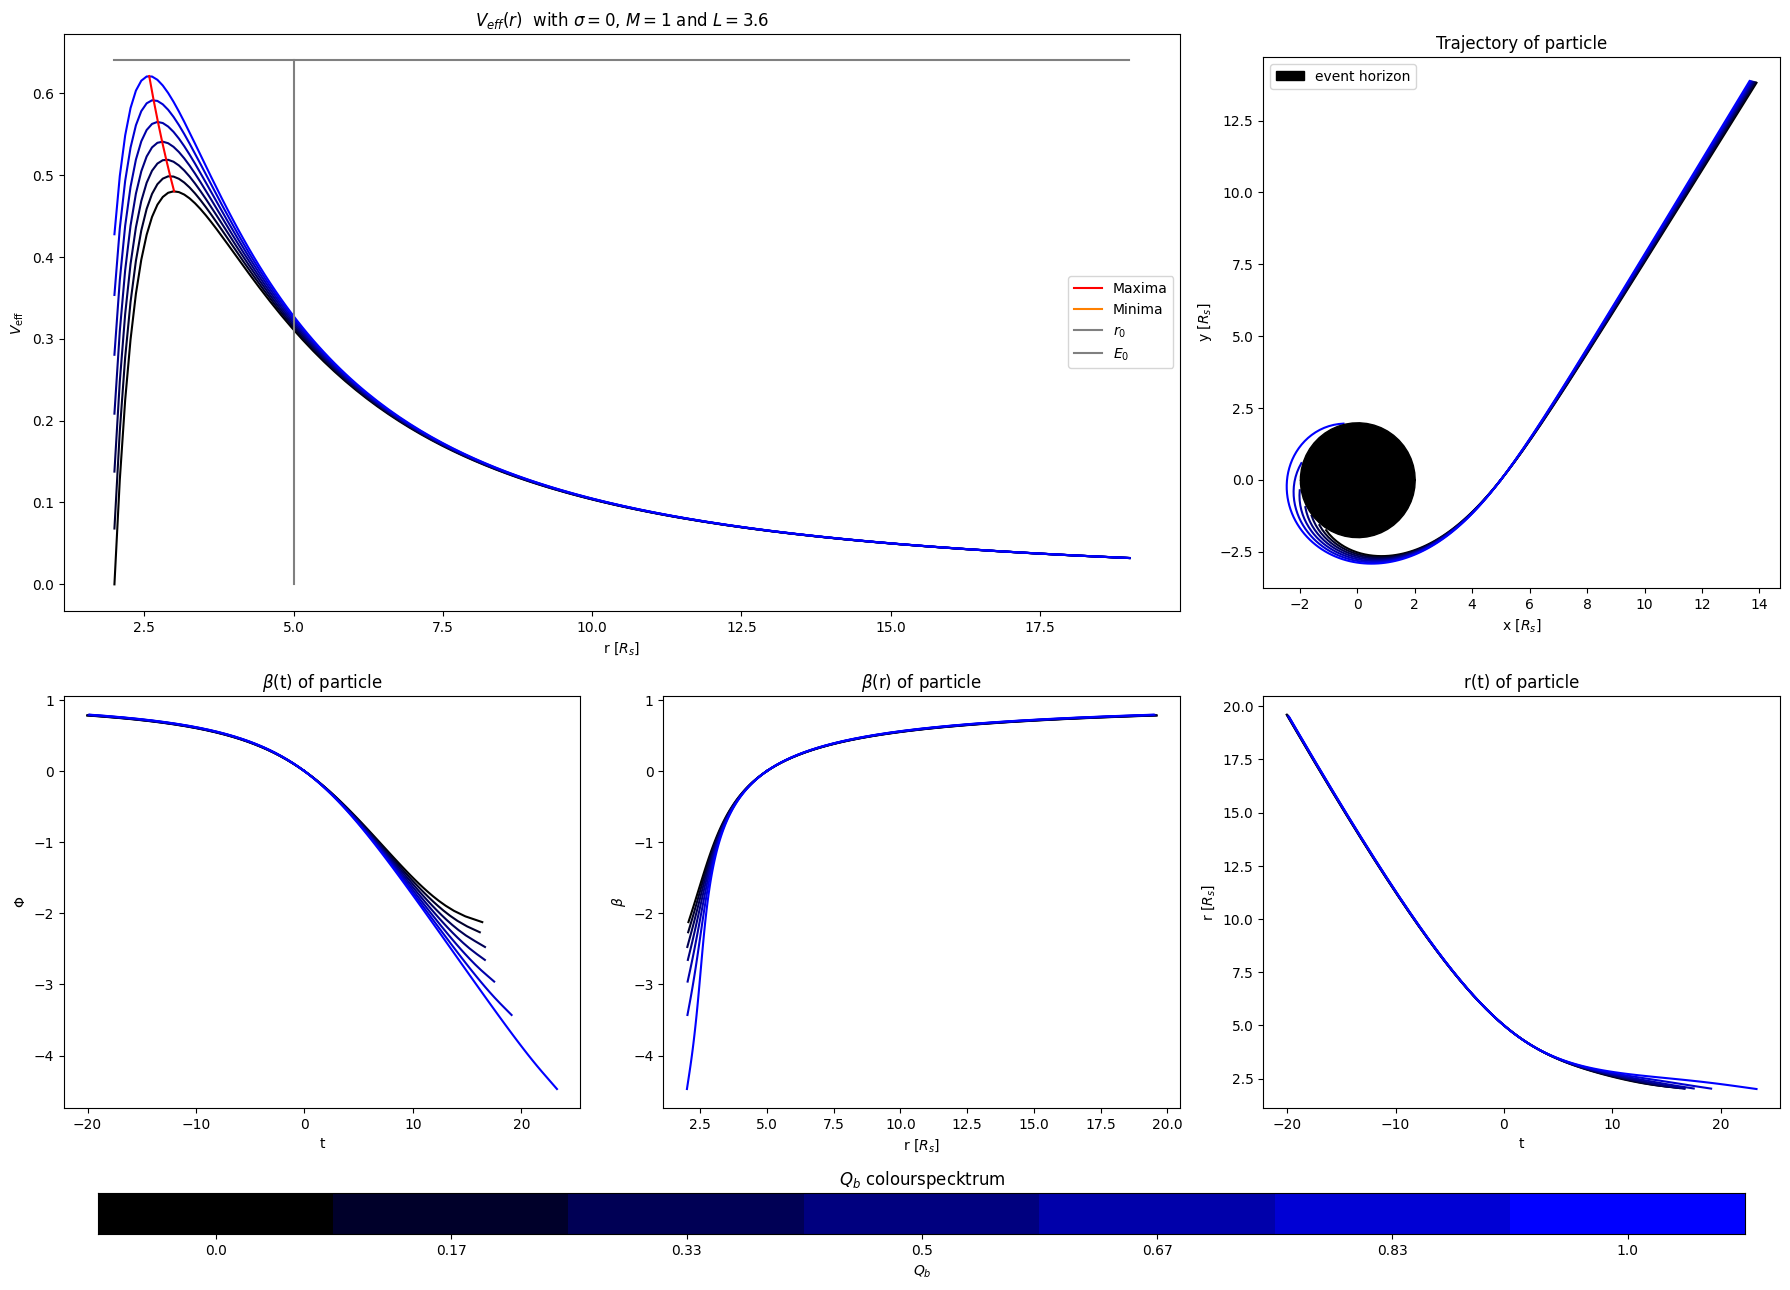

In [7]:
Helper.trPlot(BlackHole.Impr, grad=7, sigma=0, E = -0.8,L=3.6, end=20, M=1, r_0=5)

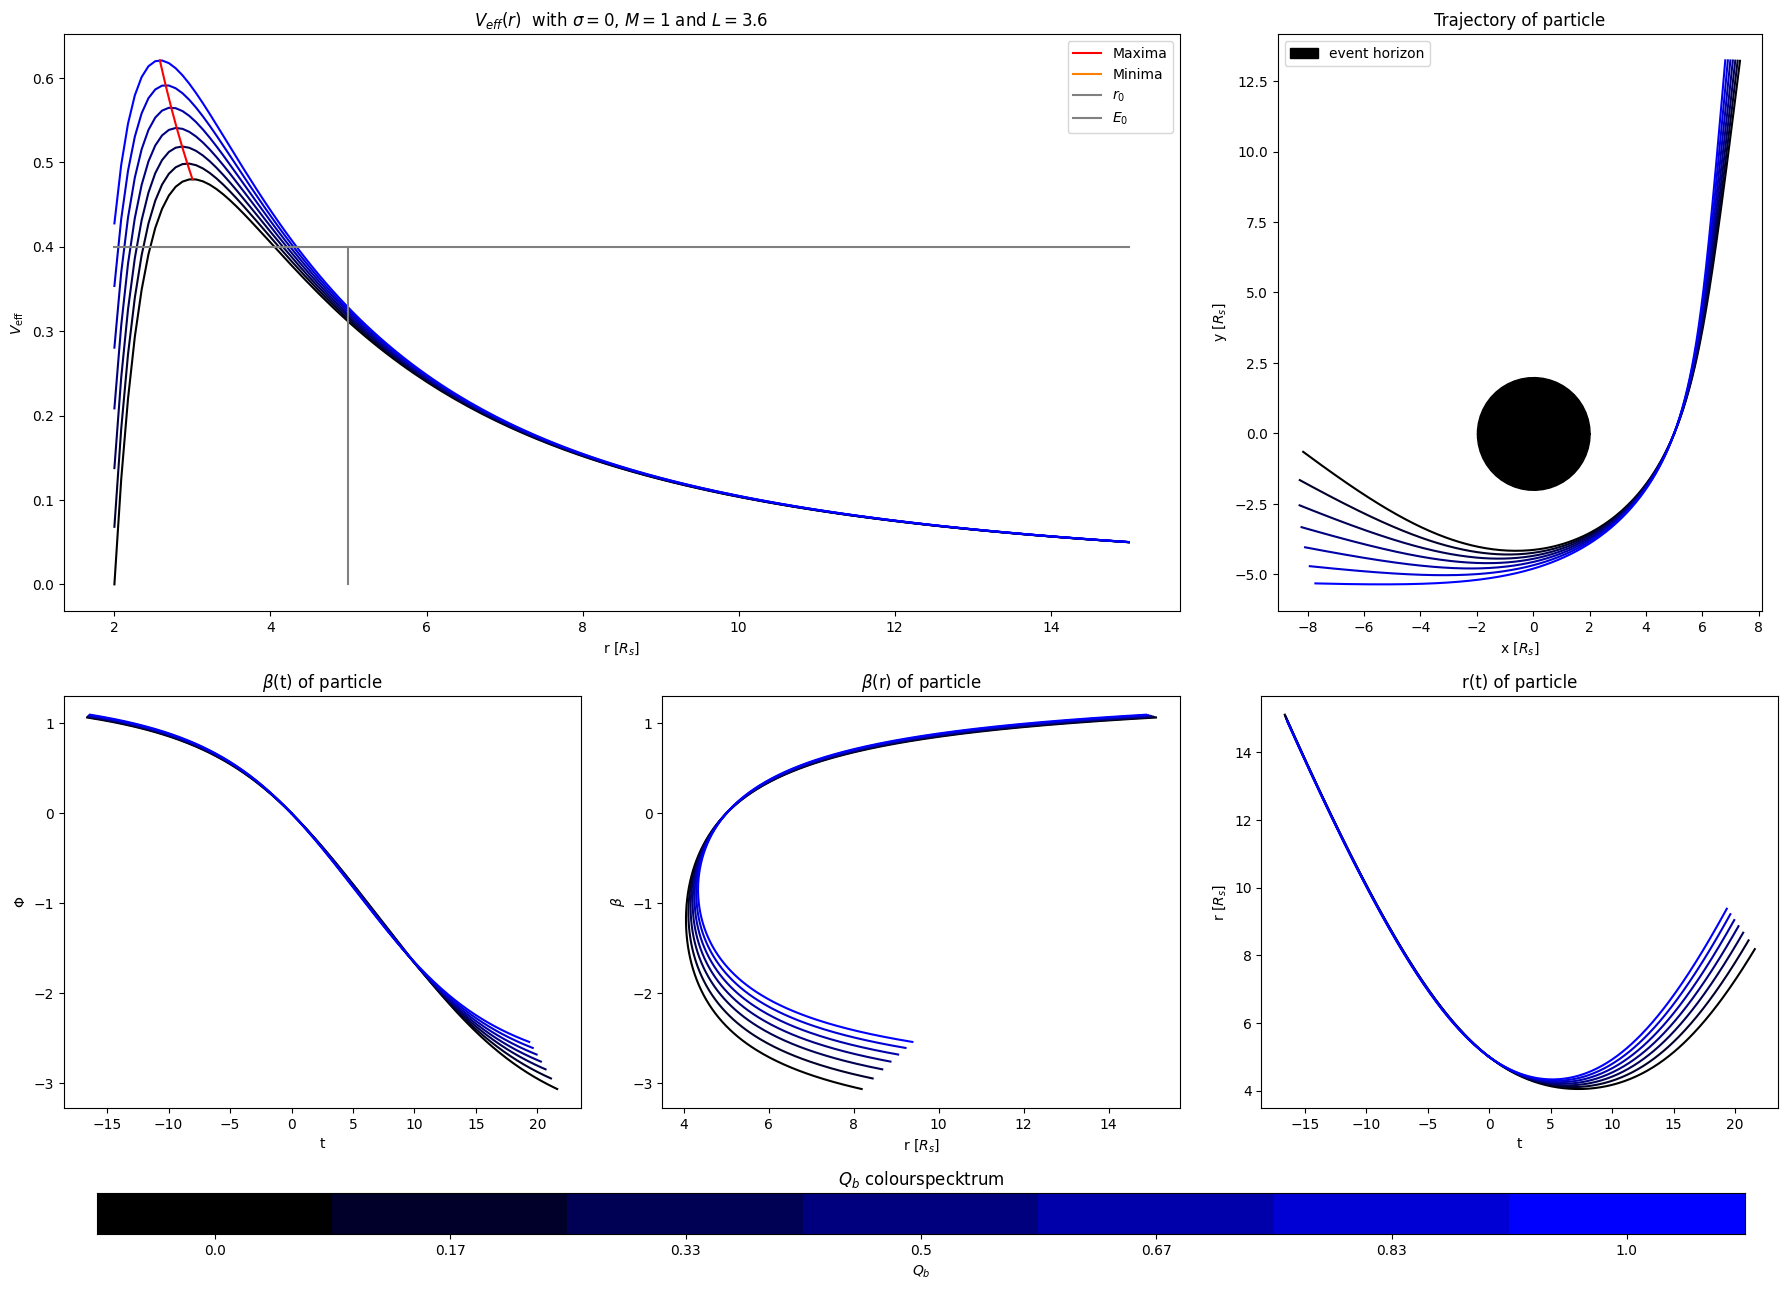

In [8]:
Helper.trPlot(BlackHole.Impr, grad=7, sigma=0, E = -np.sqrt(0.4),L=3.6, end=20, M=1, r_0=5)

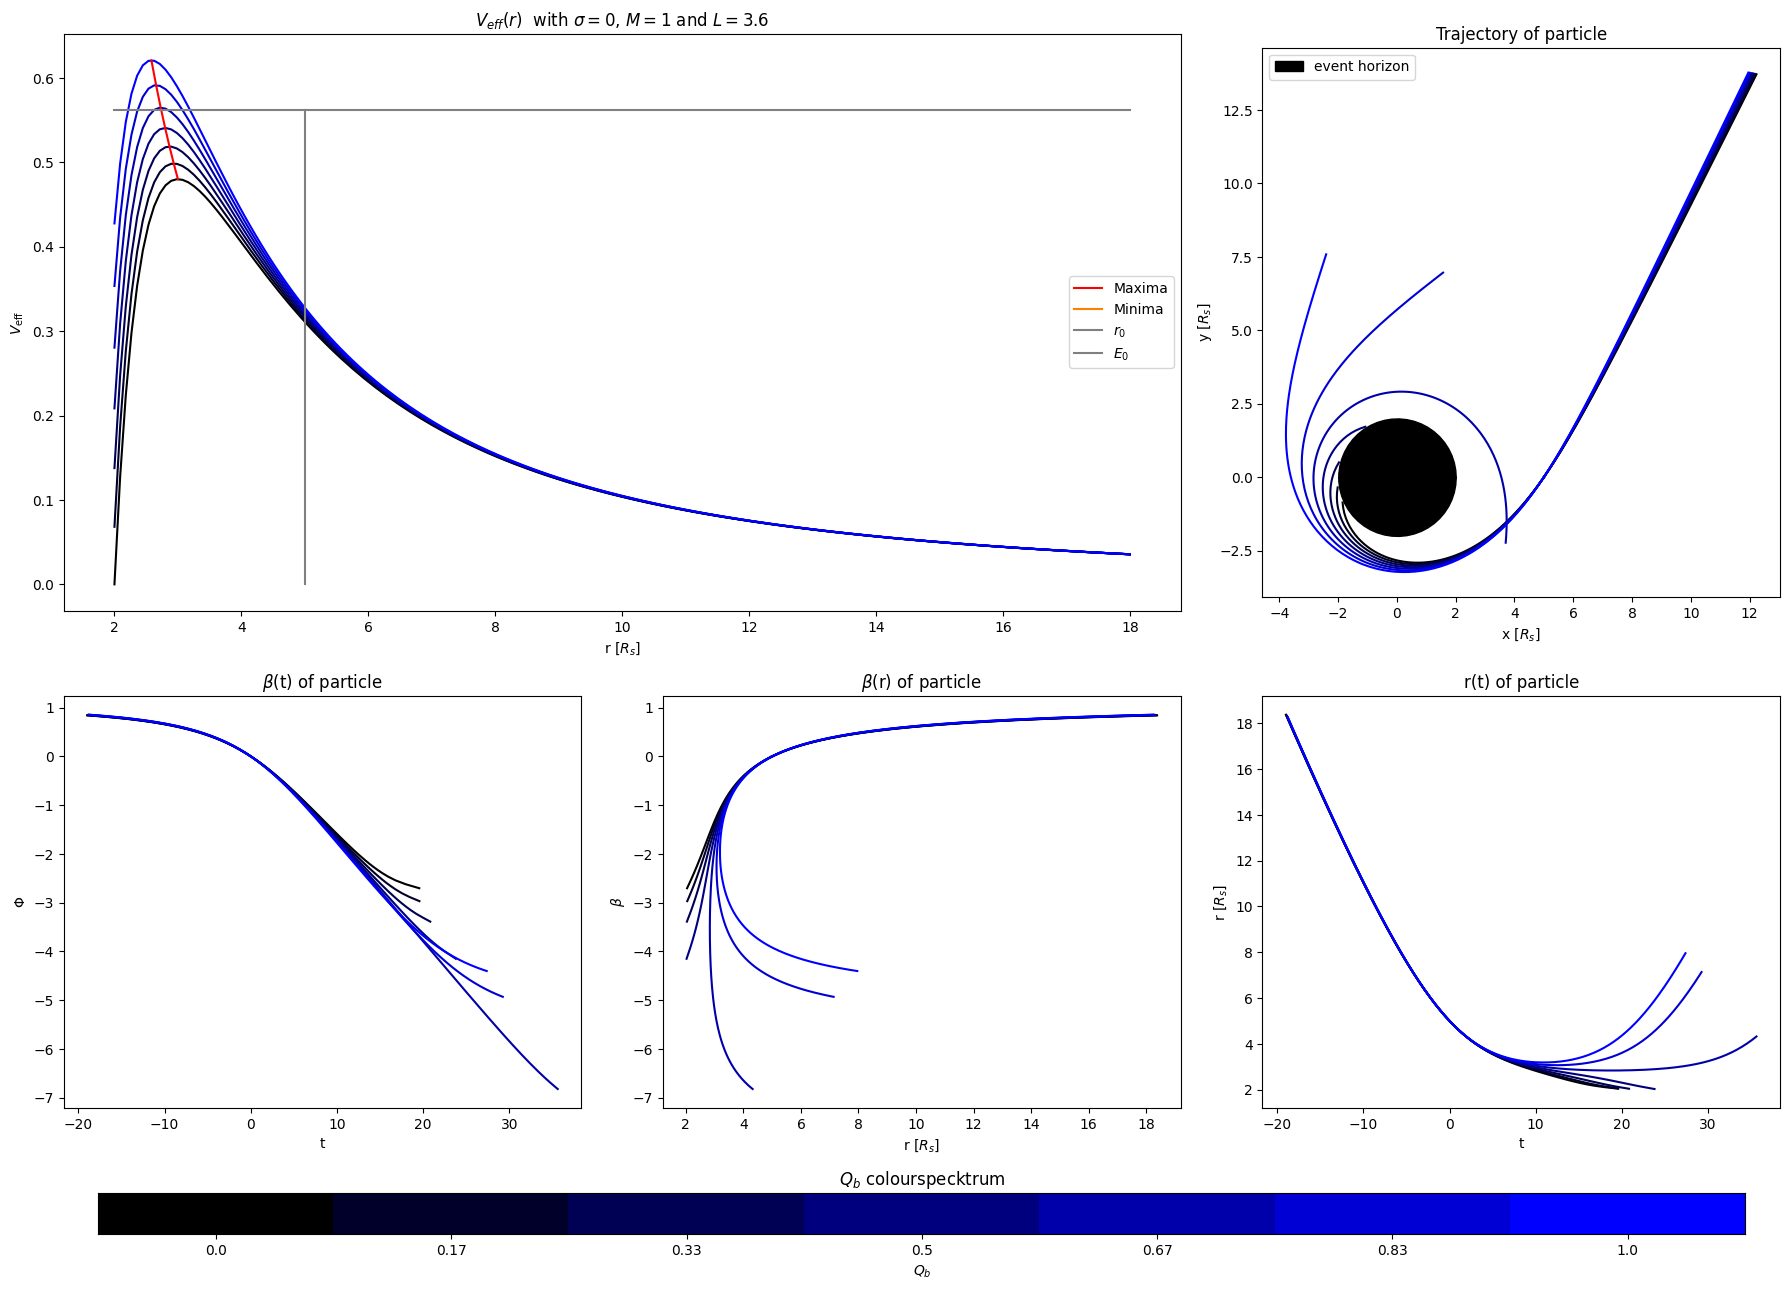

In [9]:
Helper.trPlot(BlackHole.Impr, grad=7, sigma=0, E = -0.75,L=3.6, end=20, M=1, r_0=5)

We see that depending on $Q_b$ some light can escape the black hole, which it otherwise cannot do. This is equivalent to our observation regarding the effective potential.

### Shadow of a black hole

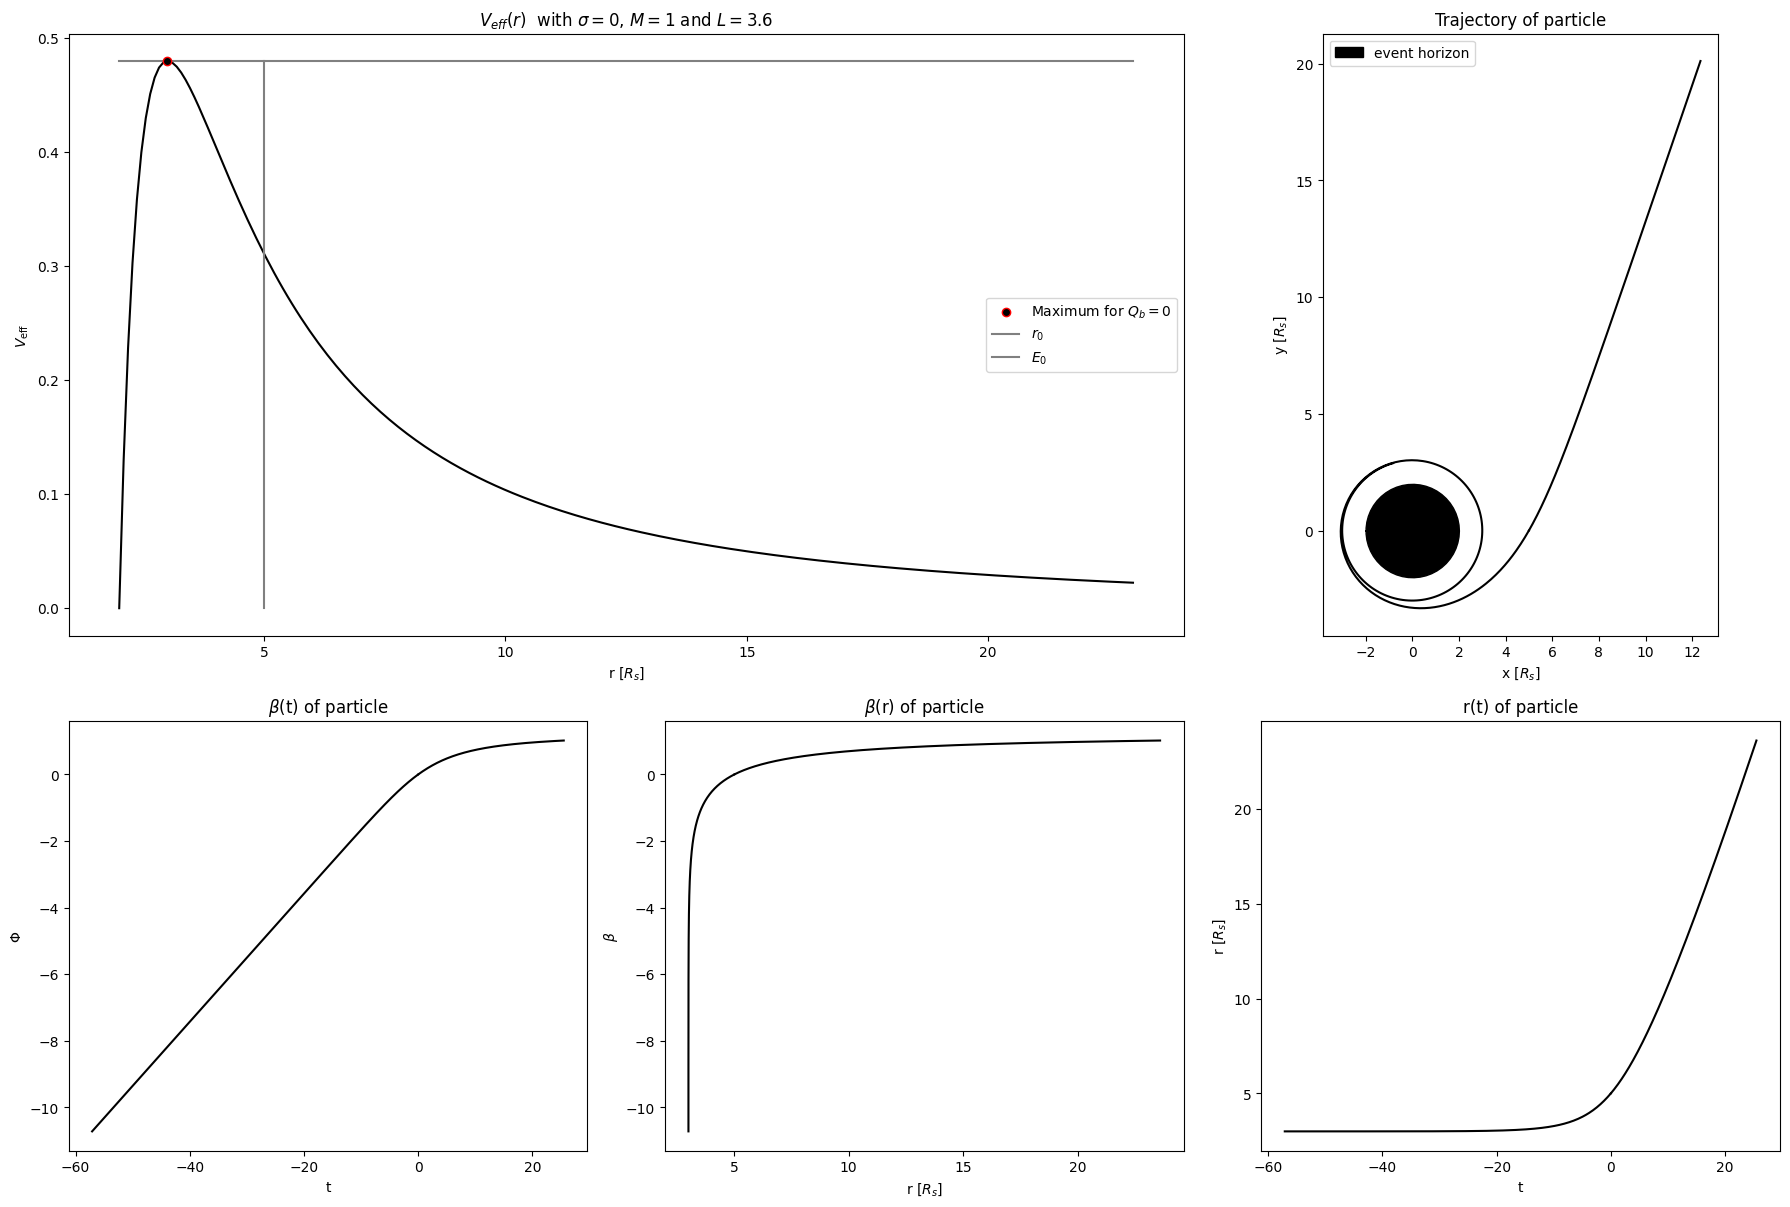

In [10]:
Helper.trPlot(BlackHole.Impr, sigma=0, E = np.sqrt(0.48),L=3.6, end=30, M=1, r_0=5, )

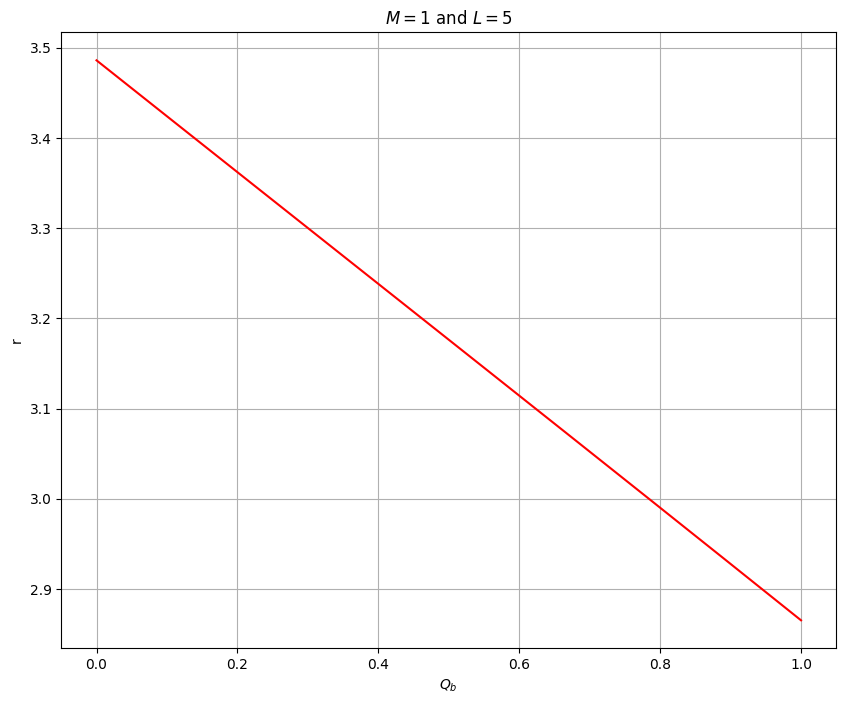

In [11]:
Helper.Shadow_BH(BlackHole.Impr, grad=10, L=5)

We see that the shadow of a black hole becomes smaller as $Q_b$ increases, and the relationship appears to be almost linear.

## Light deflection 

In [12]:
def plotSourcePoints(ax, metric, source=True, r_0=20, D_ls=100,D_ol=100, end=300,blue=0, skizze=True):
    L=np.sqrt(float(metric.h.subs(r,r_0)))
    E=np.sqrt(float(metric.f.subs(r,r_0)))

    tau_span = [0, end]
    tau_list = np.linspace(tau_span[0], tau_span[1], 200) 
    sp, sn, f = metric.solve_DAE(tau_list, tau_span, D_ol, sigma =0, L = L, E = E, phi_0=-0.5*np.pi)

    b=20
    beta=(np.pi/2-abs(np.arctan(   (sn[1][b] * np.sin(sn[2][b])+D_ol) / (sn[1][b] * np.cos(sn[2][b])))))*abs(np.arctan(   (sn[1][b] * np.sin(sn[2][b])+D_ol) / (sn[1][b] * np.cos(sn[2][b])))) / (np.arctan(   (sn[1][b] * np.sin(sn[2][b])+D_ol) / (sn[1][b] * np.cos(sn[2][b]))))
    
    if beta != 0: D_os=D_ls/np.sin(beta)*np.sin( np.pi - beta- np.arcsin(beta* D_ol / D_ls))
    else: D_os= D_ls+D_ol

    differenzen=np.abs(sn[1][30:] - D_ls)
    ind=np.argmin(differenzen)+30
    ax.scatter(sn[1][ind] * np.cos(sn[2][ind]), sn[1][ind] * np.sin(sn[2][ind])+D_ol ,zorder=6, color=(0,0,blue), label=f'S with $Q_b={blue}$')
    ax.plot(sn[1][:ind] * np.cos(sn[2][:ind] ), sn[1][:ind]  * np.sin(sn[2][:ind] )+D_ol, color=(0,0,blue))
    ax.set_aspect('equal', adjustable='datalim')

    if source:
        ax.scatter((D_os *np.sin(beta)), (D_os *np.cos(beta)), zorder=5, label='I', color='gray')
        ax.plot((0, D_os *np.sin(beta)), (0,D_os *np.cos(beta)), zorder=-1, color='gray', linestyle='--')

    if skizze:
        ax.plot((0,sn[1][ind] * np.cos(sn[2][ind])), (0, sn[1][ind]  * np.sin(sn[2][ind])+D_ol), linestyle='--', color='gray')
        ax.plot((0,sn[1][ind] * np.cos(sn[2][ind])), (0, sn[1][ind]  * np.sin(sn[2][ind])+D_ol), linestyle='--', color='gray')

        ax.plot((0, 0), (0, D_ol), zorder=-1, color='green', linestyle='--')

        winkel=np.linspace(np.pi/2 , np.pi/2 - beta)
        R=D_ol/3
        ax.plot(R*np.cos(winkel), R*np.sin(winkel), color='gray')

        winkel=np.linspace(np.arctan((sn[1][ind]  * np.sin(sn[2][ind])+D_ol)/(sn[1][ind] * np.cos(sn[2][ind]))), np.pi/2 - beta)
        R=D_ol/2
        ax.plot(R*np.cos(winkel), R*np.sin(winkel), color='gray')
    ax.autoscale(enable=True, axis='both', tight=False)

def PlotLightDefl(metric, grad=3, D_ls=60, D_ol=100,r_0=3.6):
    fig, ax = plt.subplots(1, 1, figsize=(25, 8))  
    Q_b=np.linspace(0,1,grad)
    for i in range(len(Q_b)):
        metric.set_parameters((Q_b[i],0,2))
        plotSourcePoints(ax, metric, r_0=r_0, blue=Q_b[i], D_ls=D_ls, D_ol=D_ol, source= i==0, skizze=False)

    ax.scatter((0), (D_ol), zorder=5, c='black')
    ax.scatter(0,0, c='red', label='Observer')
    ax.set_aspect('equal', adjustable='box')
    ax.legend()

    plt.show()

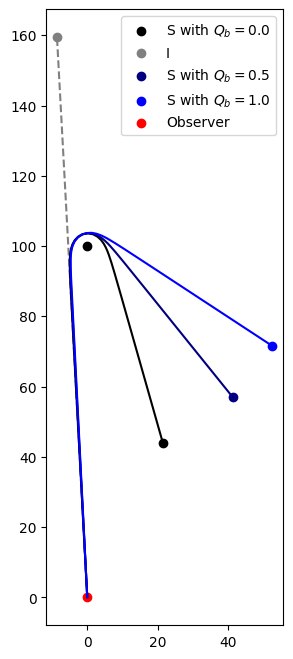

In [13]:
PlotLightDefl(BlackHole.Impr, r_0=3.6)

r

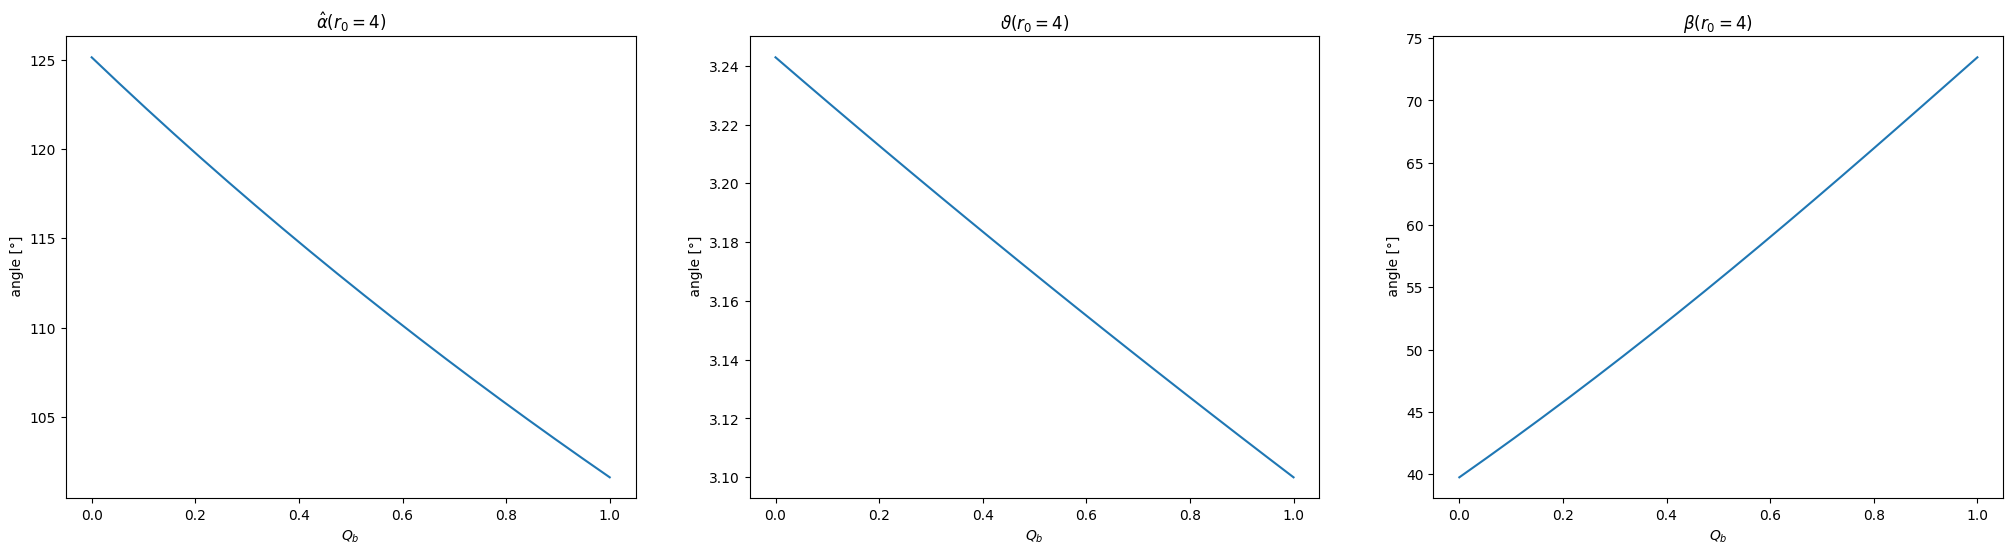

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(25, 6))  
r_0=4

ax[1].set_title( rf'$ \vartheta  (r_0={r_0})$' )
Helper.Theta(ax[1], BlackHole.Impr, r_0=r_0)
Helper.Beta(ax[2], BlackHole.Impr, r_0=r_0)
ax[2].set_title(rf'$ \beta (r_0={r_0})$')
Helper.Light_deflection(ax[0], BlackHole.Impr, r_0=r_0)
ax[0].set_title(rf'$\hat \alpha (r_0={r_0})$')
plt.show()

## Time delay

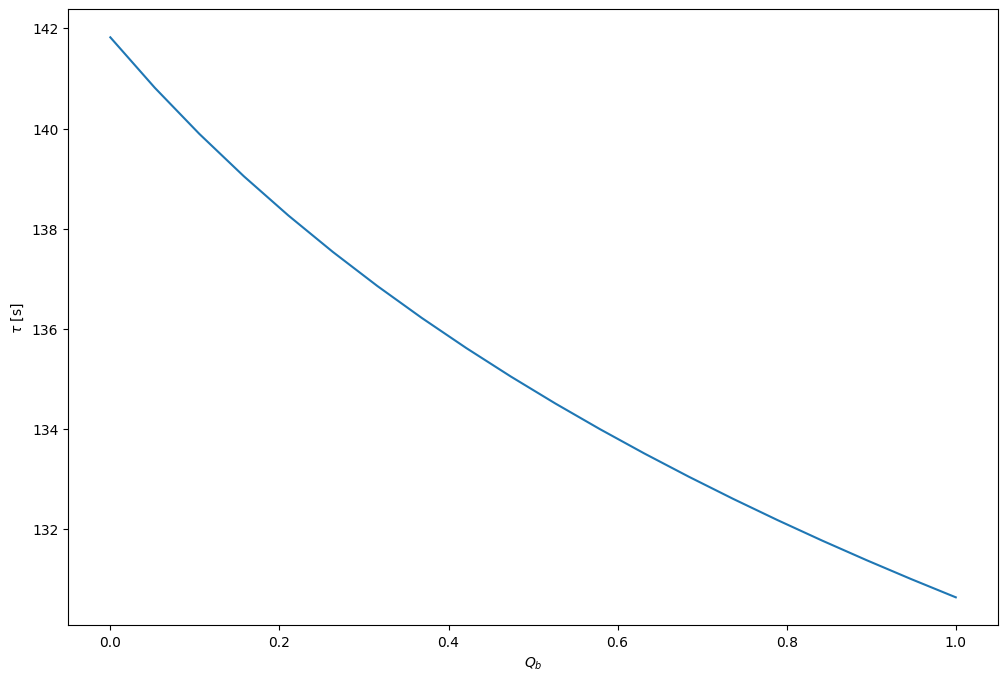

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))  
Helper.PlotTimeDelay(ax, BlackHole.Impr, r_0=3.2)

# References
[1]
Federica Fragomeno, Douglas M. Gingrich, Samantha Hergott, Saeed Rastgoo, Evan Vienneau,. *A generalized uncertainty-inspired quantum black hole,* URL: https://arxiv.org/abs/2406.03909

[2]
Wikipedia. *Generalized uncertainty principle*, URL: https://en.wikipedia.org/wiki/Generalized_uncertainty_principle